In [ ]:
#Project1: House price prediction
'''
steps
step1: data collection
step2: data cleaning (here data is already clean)
step3: data splitting
step4: model training
step5:visualization
step6: model testing
step7: prediction

'''

In [76]:
import pandas as pd
df=pd.read_csv(r'C:\Users\AARUSHI TANDON\Downloads\house_prices_50.csv')
df.head()

,Area,Price
0,1260,8220000
1,1694,12805000
2,1530,11001000
3,1495,9829000
4,3492,23422000


In [82]:
from sklearn.model_selection import train_test_split
X=df[['Area']].values
y=df['Price'].values
# Feature scaling (Min-Max scaling)
X_min, X_max = X.min(), X.max()
y_min, y_max = y.min(), y.max()
X_scaled = (X - X_min) / (X_max - X_min)
y_scaled = (y - y_min) / (y_max - y_min)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (40, 1)
X_test shape:  (10, 1)
y_train shape:  (40,)
y_test shape:  (10,)


In [98]:
#training linear regression from scratch
import numpy as np

w=0
b=0 #initialising w and b

learning_rate=0.08
epochs=1000
m=len(X_train)


In [99]:
#Gradient descent loop
for i in range(epochs):
    y_pred=w*X_train+b
    error=y_pred-y_train.reshape(-1,1)
    dw=(1/m)*np.sum(error*X_train)
    db=(1/m)*np.sum(error)
    w=w-learning_rate*dw
    b=b-learning_rate*db
    if i % 100 == 0:
        loss = (1/(2*m)) * np.sum(error**2)
        print(f"Epoch {i}, Loss: {loss}")

print(f"Trained weight w is {w}")
print(f"Trained bias b is {b}")

Epoch 0, Loss: 0.1554822087216166
Epoch 100, Loss: 0.009202171284375345
Epoch 200, Loss: 0.0040588595052900005
Epoch 300, Loss: 0.0021638646551021996
Epoch 400, Loss: 0.001465675305070917
Epoch 500, Loss: 0.0012084353614115453
Epoch 600, Loss: 0.0011136582230737671
Epoch 700, Loss: 0.0010787386618900943
Epoch 800, Loss: 0.0010658729458044862
Epoch 900, Loss: 0.001061132718700118
Trained weight w is 0.9504564823690975
Trained bias b is -0.020988608670773734


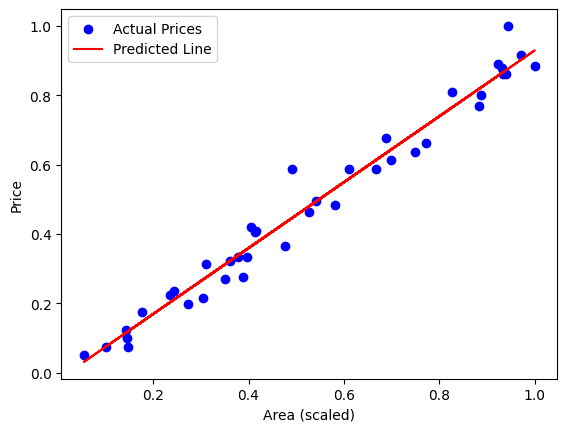

In [100]:
import matplotlib.pyplot as plt
y_pred=w*X_train+b
plt.scatter(X_train, y_train, color='blue', label='Actual Prices')
plt.plot(X_train, y_pred, color='red', label='Predicted Line')
plt.xlabel('Area (scaled)')
plt.ylabel('Price')
plt.legend()
plt.show()

In [101]:
y_test_pred=w*X_test+b
m = len(X_test)  # number of test samples
error = y_test_pred - y_test.reshape(-1, 1)
mse = (1/m) * np.sum(error ** 2)
print(f"Mean Squared Error on test data: {mse}")


Mean Squared Error on test data: 0.0025113057605969154


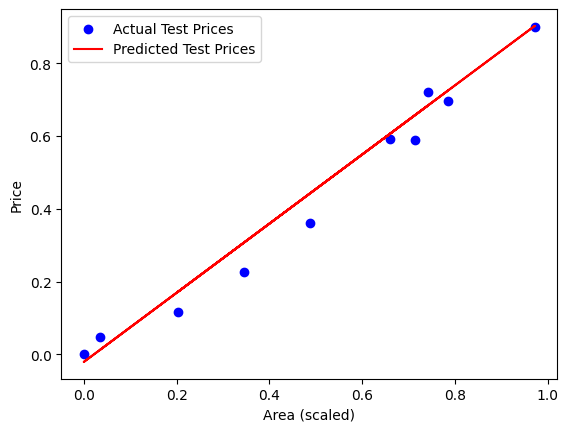

In [102]:
plt.scatter(X_test, y_test, color='blue', label='Actual Test Prices')
plt.plot(X_test, y_test_pred, color='red', label='Predicted Test Prices')
plt.xlabel('Area (scaled)')
plt.ylabel('Price')
plt.legend()
plt.show()


In [103]:
area_input = float(input("Enter area in sq.ft: "))
scaled_area = (area_input - X_min) / (X_max - X_min)
predicted_price_scaled = w * scaled_area + b
predicted_price = predicted_price_scaled * (y_max - y_min) + y_min

print(f"Predicted Price for {area_input} sq.ft = ₹{predicted_price:.2f}")


Enter area in sq.ft:  1255


Predicted Price for 1255.0 sq.ft = ₹9093583.75
